# Predictive Modeling - Regression

This workshop contains predictive analytics for house price prediction using Boston dataset.  

Step 1: Predict house prices directly from the dataset using linear regression   
1.  Load the Boston dataset.  
2.  Check for missing values.  
3.  Run Linear Regression Model without any data preprocessing.  
  
Step 2:  Pre-process data for improving accuracy of the predictive model    
1. Explore the dataset using boxplots.   
2. Standardize features due to findings from boxplots.  
3. Run Linear regression model  
4. Explore the dataset using correlation plots.  

Step 3:   Neural Network Regression using pre-processed data    
1. Run Neural Network to predict house price.  

## Step 1: Predict house prices using linear regression

In [0]:
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Predictive Analytics models
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import train_test_split

Most common libraries are pre-installed in Google Colab environment. However, sometimes you would need libraries that are not installed. You can use "!pip install (libname)" to install such libraries.

In [2]:
!pip install scipy

### Load the dataset

In [0]:
df = pd.read_csv('tp3_boston_data.csv')  # Load the dataset

In [4]:
print(df.keys())  # We print the value of the boston_dataset to understand what it contains. print(boston_dataset.keys()) gives

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


**Description of the dataset:**  
CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per 10,000 dollars  
PTRATIO - pupil-teacher ratio by town  
LSTAT - % lower status of the population  
MEDV - Median value of owner-occupied homes in $1000's (target)   

In [0]:
# split the dataset into predictors (df_x) and target variable (df_y)
df_x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
df_y = df[['medv']]

### Check for missing values

In [6]:
# Check for missing values
df_x.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
dtype: int64

No missing values for predictors.

In [7]:
df_y.isnull().sum()

medv    0
dtype: int64

No missing values.  

In [8]:
# Have a look at the predictors
df_x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [9]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


### Split the data

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size = 0.33, random_state = 5)

### Linear regression modeling

Method API: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [0]:
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)

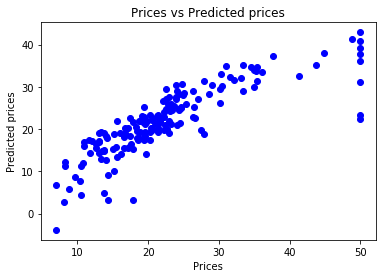

In [12]:
plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [13]:
# Calculate 
error = np.sqrt(np.mean((Y_predict - Y_test)**2))
print('Root Mean Squared Error: ' + str(error))

Root Mean Squared Error: medv    5.309472
dtype: float64


In [14]:
error_1 = np.sqrt(mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error: ' + str(error_1))

Root Mean Squared Error: 5.309471828719486


## Step 2: Pre-process data

### Box plot analysis

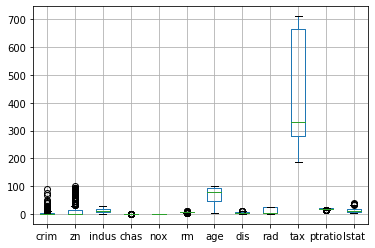

In [15]:
# Box plot analysis
df_x.boxplot()

Data dispersion is extremely different among different features. Thus, scaling/standardization is required.

### Data Standardization

In [16]:
# Use standard scaling from sklearn library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
df_x_scaled = scaler.transform(df_x)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=df_x.columns)

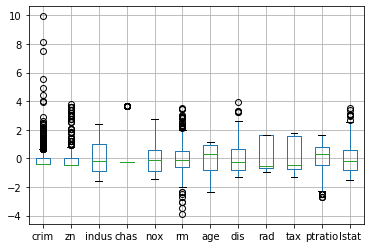

In [18]:
# Show boxplot for scaled predictors
df_x_scaled.boxplot()

### Regression Modeling

In [0]:
# Run the predictive model to see whether accuracy has improved.
X_train, X_test, Y_train, Y_test = train_test_split(df_x_scaled, df_y, test_size = 0.33, random_state = 5)

In [0]:
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)

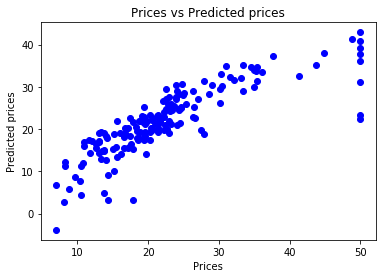

In [21]:
plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [22]:
error_2 = np.sqrt(mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error: ' + str(error_2))

Root Mean Squared Error: 5.309471828719491


Attempt 1 (original data) RMSE: 5.309471828719486    
Attempt 2 (with scaling) RMSE: 5.309471828719491  
We do not see any difference in scaling in this case.

### Correlation Analaysis

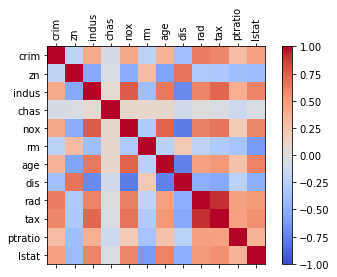

In [23]:
# Correlation plot
corr = df_x_scaled.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_x_scaled.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_x_scaled.columns)
ax.set_yticklabels(df_x_scaled.columns)
plt.show()

## Step 3: Neural Networks

Model an advanced predictive model using standard neural network.

In [0]:
from sklearn.neural_network import MLPRegressor

Method API: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [0]:
mlp = MLPRegressor(hidden_layer_sizes=(60), max_iter=1000)

In [0]:
mlp.fit(X_train, Y_train)

In [0]:
Y_predict = mlp.predict(X_test)

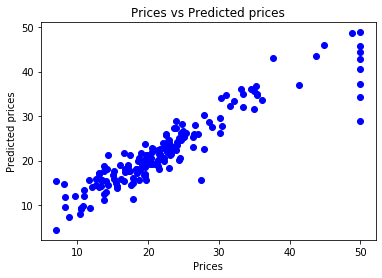

In [28]:
# Plot the predicted values
plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [29]:
error_3 = np.sqrt(mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error: ' + str(error_3))

Root Mean Squared Error: 3.6198115586834243


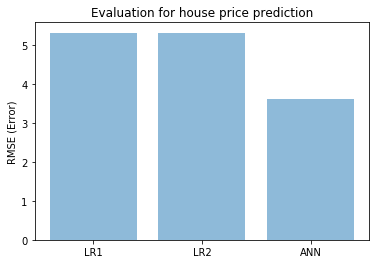

In [30]:
models = ['LR1', 'LR2', 'ANN']
y_pos = np.arange(len(models))
performance = [error_1, error_2, error_3]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('RMSE (Error)')
plt.title('Evaluation for house price prediction')
 
plt.show()

## Exercise  
We can improve the accuracy by focusing on the data pre-processing and feature engineering. On approach is to transform skewed data (as you already exposed in Predictive Analytics).  
Therefore, as an expercise you can attempt to visualize the data skewness of the dataset, and transform the data accordingly (e.g., log or square transformation.)  
An example can be found from this medium article on [Transforming Skewed Data for Machine Learning](https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0).  
Inition few steps are as follows:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77da8cf160>,
      dtype=object)

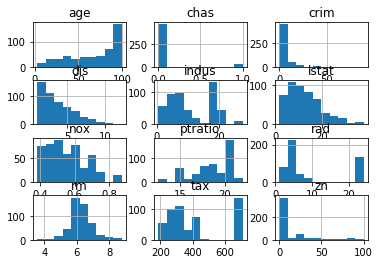

In [31]:
# Visualize the data discribtion using pandas dataframe:
df_x.hist()

Calculate skewness for all the continous variables.

In [32]:
# determine index for continouse variables
cts_vars = df_x.dtypes[df_x.dtypes != 'object'].index

# Calculate the skewness and then sort
skew_vars = df_x[cts_vars].skew().sort_values(ascending=False)
print(skew_vars)

crim       5.223149
chas       3.405904
zn         2.225666
dis        1.011781
rad        1.004815
lstat      0.906460
nox        0.729308
tax        0.669956
rm         0.403612
indus      0.295022
age       -0.598963
ptratio   -0.802325
dtype: float64


We can address skewed variables by transforming them (i.e. applying the same function to each value). Common transformations include square root (sqrt(x)), logarithmic (log(x)), and reciprocal (1/x).

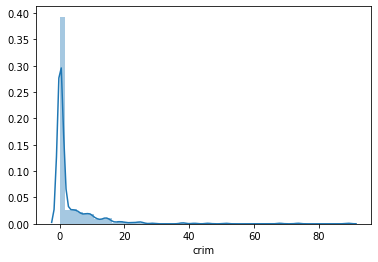

In [33]:
sns.distplot(df_x['crim'])

In [0]:
crim_var = df_x['crim']

**Square root transformation.**

In [0]:
sqrt_crim = crim_var ** (1/2)

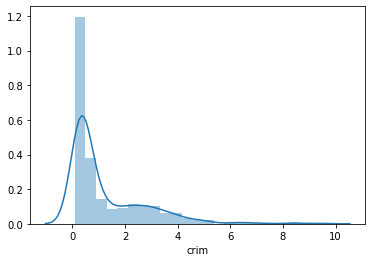

In [36]:
sns.distplot(sqrt_crim)

**Log Transformation.**

In [0]:
log_crim = np.log(crim_var)

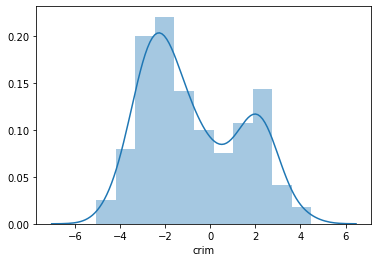

In [38]:
sns.distplot(log_crim)

The log transformation seems to have de-skewed, as the distribution of transformed crime is the most symmetrical. 

Therefore, we can construct the new variable (i.e., log_crim) instead of crim.


In [0]:
# create a new varaiable for log_crim
df_x['log_crim'] = log_crim

Important: Once you create the new variable, make sure delete the original variable when using the dataframe as a predictor. (Discuss why?)

In [0]:
del df_x['crim']

In [41]:
df_x.keys()

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'log_crim'],
      dtype='object')